In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

%matplotlib inline

In [2]:
data=pd.read_csv('ads.csv',index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.shape

(200, 4)

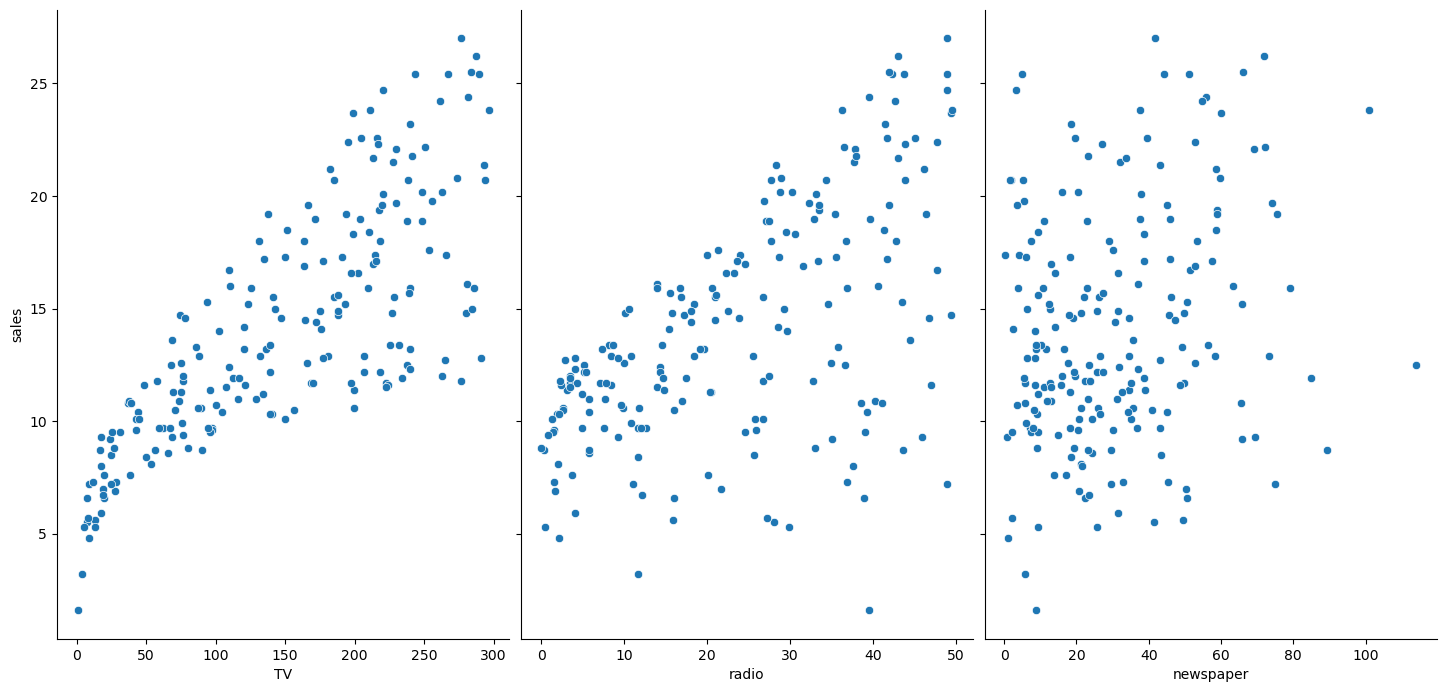

In [4]:
sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars='sales',height=7,aspect=0.7)

### TV

In [5]:
lm1=smf.ols(formula='sales~TV',data=data).fit()

In [6]:
lm1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [7]:
X_new=pd.DataFrame({'TV':[50]})
lm1.predict(X_new)

0    9.409426
dtype: float64

### Radio

In [8]:
lm2=smf.ols(formula='sales~radio',data=data).fit()

In [9]:
lm2.params

Intercept    9.311638
radio        0.202496
dtype: float64

In [10]:
Y_new=pd.DataFrame({'radio':[50]})
lm2.predict(Y_new)

0    19.436427
dtype: float64

### Newspaper

In [11]:
lm3=smf.ols(formula='sales~newspaper',data=data).fit()

In [12]:
lm3.params

Intercept    12.351407
newspaper     0.054693
dtype: float64

In [13]:
Z_new=pd.DataFrame({'newspaper':[50]})
lm3.predict(Z_new)

0    15.086062
dtype: float64

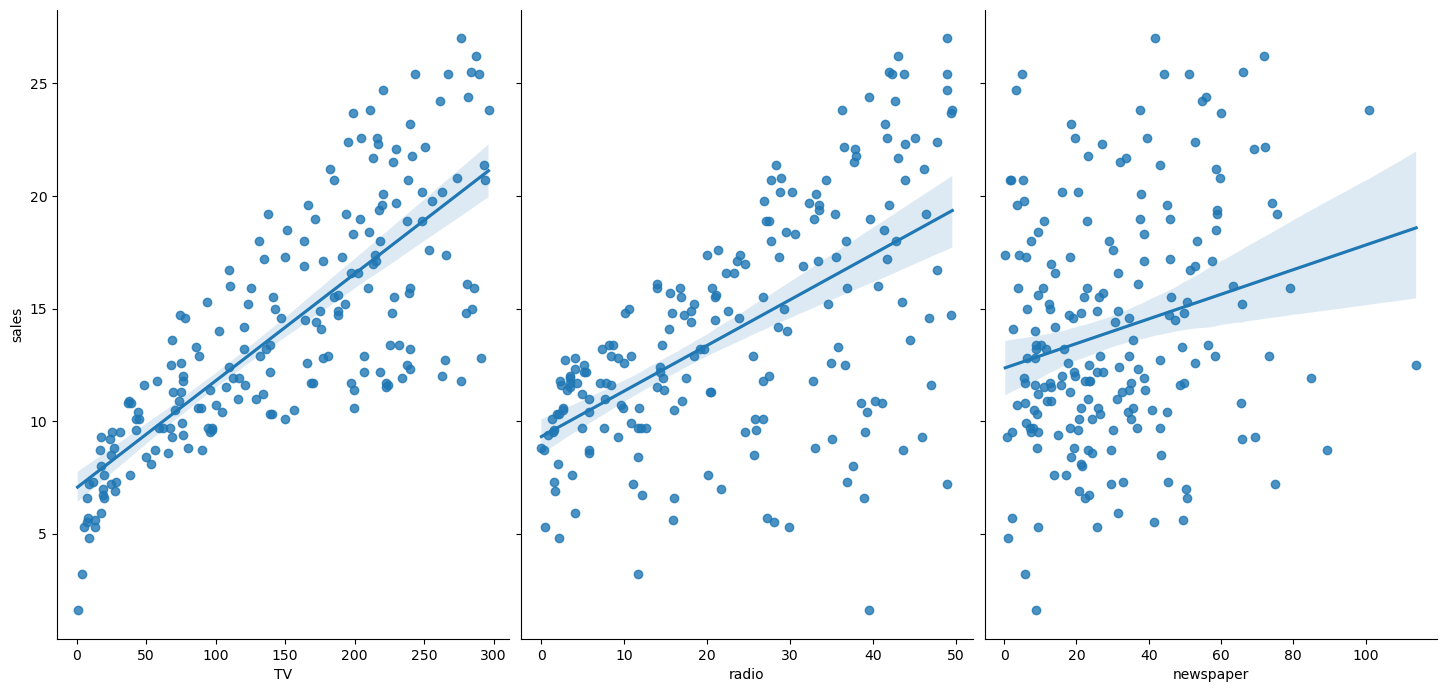

In [14]:
sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars='sales',height=7,aspect=0.7,kind='reg' )

In [15]:
lm1.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [16]:
lm2.conf_int()

,0,1
Intercept,8.201588,10.421688
radio,0.162244,0.242747


In [17]:
lm3.conf_int()

,0,1
Intercept,11.125956,13.576859
newspaper,0.022005,0.087381


In [18]:
lm1.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [19]:
lm2.pvalues

Intercept    3.561071e-39
radio        4.354966e-19
dtype: float64

In [20]:
lm3.pvalues

Intercept    4.713507e-49
newspaper    1.148196e-03
dtype: float64

In [21]:
lm1.rsquared

0.611875050850071

In [22]:
lm2.rsquared

0.33203245544529536

In [23]:
lm3.rsquared

0.05212044544430516

### All Three Combined

In [24]:
lm4=smf.ols(formula='sales~TV+radio+newspaper',data=data).fit()

In [25]:
lm4.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

In [26]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           1.58e-96
Time:                        14:36:22   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Excluding Newspaper

In [27]:
lm5=smf.ols(formula='sales ~ TV+ radio',data=data).fit()

In [28]:
lm5.rsquared

0.8971942610828957

### Including Newpaper

In [29]:
lm6=smf.ols(formula='sales ~ TV+ radio + newspaper',data=data).fit()

In [30]:
lm6.rsquared

0.8972106381789522